In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text
from sqlalchemy import Table, Column, Integer, String

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_dt = session.query(Measurement.date).order_by((Measurement.date.desc())).first().date
print(recent_dt)

2017-08-23


In [10]:
mnths_bfr = dt.date(2017,8,23) - dt.timedelta(days=365)
print(mnths_bfr)

2016-08-23


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
measur_df = pd.read_sql(session.query(Measurement.date, Measurement.prcp).order_by((Measurement.date.desc())).\
    filter(Measurement.date >= '2016-08-23').statement,session.bind)
measur_df

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2225,2016-08-23,0.05
2226,2016-08-23,NaN
2227,2016-08-23,0.02
2228,2016-08-23,1.79


In [12]:
measure_srt_df = measur_df.sort_values(by='date').dropna()
measure_srt_df

,date,prcp
2229,2016-08-23,0.70
2223,2016-08-23,0.00
2224,2016-08-23,0.15
2228,2016-08-23,1.79
2227,2016-08-23,0.02
...,...,...
4,2017-08-22,0.00
3,2017-08-23,0.45
2,2017-08-23,0.08
1,2017-08-23,0.00


2017-08-23
2016-08-23


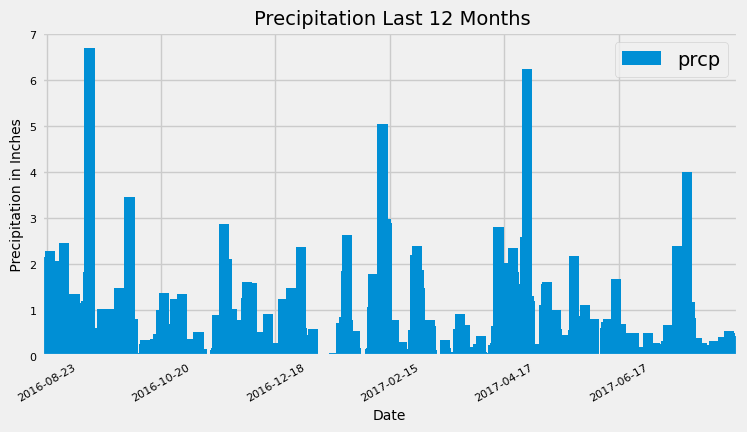

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


<Figure size 640x480 with 0 Axes>

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_dt = session.query(Measurement.date).order_by((Measurement.date.desc())).first().date
print(recent_dt)
# Calculate the date one year from the last date in data set.

mnths_bfr = dt.date(2017,8,23) - dt.timedelta(days=365)
print(mnths_bfr)

# Perform a query to retrieve the data and precipitation scores
prcp_for_12mnts = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').all()
prcp_for_12mnts

# Save the query results as a Pandas DataFrame. Explicitly set the column names
measur_df = pd.read_sql(session.query(Measurement.date,Measurement.prcp).order_by((Measurement.date.desc())).\
    filter(Measurement.date >= '2016-08-23').statement,session.bind)
measur_df

# Sort the dataframe by date
measure_srt_df = measur_df.sort_values(by='date').dropna()
measure_srt_df

# Use Pandas Plotting with Matplotlib to plot the data
ax = measure_srt_df.plot.bar(x='date', y='prcp', figsize=(8,4),rot=30,  fontsize=8, width=30, align="center")
plt.locator_params(axis='x', nbins=6)
plt.title(" Precipitation Last 12 Months", size=14)
plt.ylabel(" Precipitation in Inches ", size=10)
plt.xlabel("Date", size=10)
plt.show()
plt.tight_layout()

# Use Pandas to calculate the summary statistics for the precipitation data
measure_srt_df.describe()


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
num_stn = session.query(Measurement.station).distinct().count()
print(num_stn)

9


In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
mst_activ_stn = session.query(Measurement.station,func.count(Measurement.station)).\
                order_by(func.count(Measurement.station).desc()).\
                group_by(Measurement.station).first()
print(mst_activ_stn)  

# List the stations and their counts in descending order.
activ_stn = session.query(Measurement.station,func.count(Measurement.station)).\
                order_by(func.count(Measurement.station).desc()).\
                group_by(Measurement.station)
for record in activ_stn:
      print("Station:", record[0],
            "Count of stations: ", 
            record[1])

('USC00519281', 2772)
Station: USC00519281 Count of stations:  2772
Station: USC00519397 Count of stations:  2724
Station: USC00513117 Count of stations:  2709
Station: USC00519523 Count of stations:  2669
Station: USC00516128 Count of stations:  2612
Station: USC00514830 Count of stations:  2202
Station: USC00511918 Count of stations:  1979
Station: USC00517948 Count of stations:  1372
Station: USC00518838 Count of stations:  511


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_activ_stn = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
            filter(Measurement.station == 'USC00519281').all()
print(min_activ_stn) 

[(54.0, 85.0, 71.66378066378067)]


In [17]:
# Starting from the most recent data point in the database. 
stn_recent_dt = session.query(Measurement.date).filter(Measurement.station == 'USC00519281').\
                order_by((Measurement.date.desc())).first().date
print(stn_recent_dt)

# Calculate the date one year from the last date in data set.
end_dt = dt.date(2017,8,18) - dt.timedelta(days=365)
print(end_dt)


2017-08-18
2016-08-18


In [18]:
# Using the most active station id
# prcp_for_12mnts = session.query(Measurement.date,Measurement.tobs).\
#     filter(Measurement.station == 'USC00519281').\
#     filter(Measurement.date > '2016-08-18').all()
# #prcp_for_12mnts

prcp_for_12mnts = session.query(Measurement.tobs).\
   filter(Measurement.station == 'USC00519281').filter(Measurement.date >= '2016-08-18').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
temp_df = pd.DataFrame(prcp_for_12mnts, columns=['tobs'])
temp_df

temp_df['tobs'] = temp_df['tobs'].apply(np.int64)
temp_df



,tobs
0,80
1,79
2,81
3,79
4,78
...,...
352,77
353,77
354,76
355,76


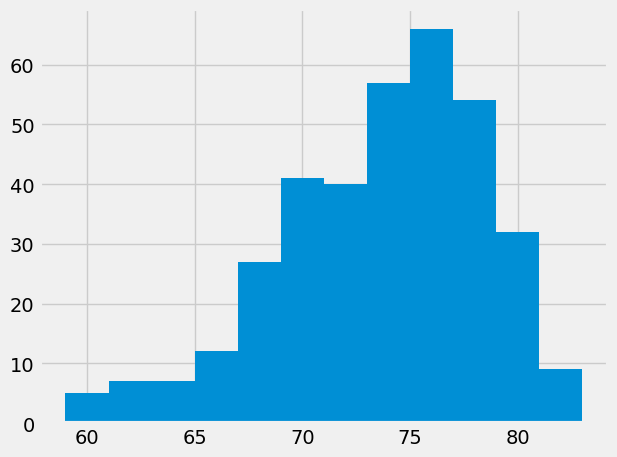

In [19]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Create a bar chart based off of the group series from before
temperatures =  temp_df['tobs']

hist = temperatures.hist(bins=12)
plt.tight_layout()
plt.show()

# Close Session

In [20]:
# Close Session
session.close()